*** Trivial Model ***

We implemented a trivial model that always predicts a given person will repay their loan. It is worth noting that this model is representative of Lending Club's prediction. Since we only have access to accepted loan data, Lending Club is inherently predicting that a loan will be repayed because they wouldn't give a loan that they expected not to be repayed.

In [21]:
#Trivial Model in which all loans are accepted
triv_mod_07_train = np.sum(df_07_y_train)/len(df_07_y_train)
triv_mod_07_test = np.sum(df_07_y_test)/len(df_07_y_test)
print('2007 Data\nTrain score: '+str(triv_mod_07_train))
print('Test score: '+str(triv_mod_07_test))
triv_mod_16_train = np.sum(df_16_y_train)/len(df_16_y_train)
triv_mod_16_test = np.sum(df_16_y_test)/len(df_16_y_test)
print('2016 Data\nTrain score: '+str(triv_mod_16_train))
print('Test score: '+str(triv_mod_16_test))

2007 Data
Train score: 0.7297181895815542
Test score: 0.7389078498293515
2016 Data
Train score: 0.7504867731972606
Test score: 0.750128684287089


*** Logistic Regression Model ***

The first model we chose is a simple logistic regression with cross validation. We trained it on the training set and printed the scores on both the training and test data sets. The test accuracy was 0.737 which is just below our trivial model's score- meaning it performs moderately worse than Lending Club's algorithm.

In [22]:
#Logistic regression on 2007 data
log_mod07 = LogisticRegressionCV().fit(df_07_X_train, df_07_y_train.values)

log_mod07_train_score = log_mod07.score(df_07_X_train,df_07_y_train.values)
log_mod07_test_score =log_mod07.score(df_07_X_test,df_07_y_test.values)
print("The accuracy of Logistic Regression Model on 2007 Training Set is ", log_mod07_train_score)
print("The accuracy of Logistic Regression Model on 2007 Testing Set is ", log_mod07_test_score)

The accuracy of Logistic Regression Model on 2007 Training Set is  0.7292912040990607
The accuracy of Logistic Regression Model on 2007 Testing Set is  0.7372013651877133


In [23]:
#Logistic regression on 2016 data
log_mod16 = LogisticRegressionCV().fit(df_16_X_train, df_16_y_train.values)

log_mod16_train_score = log_mod16.score(df_16_X_train, df_16_y_train.values)
log_mod16_test_score = log_mod16.score(df_16_X_test, df_16_y_test.values)
print("The accuracy of Logistic Regression Model on 2016 Training Set is ", log_mod16_train_score)
print("The accuracy of Logistic Regression Model on 2016 Testing Set is ", log_mod16_test_score)

The accuracy of Logistic Regression Model on 2016 Training Set is  0.7518407859988362
The accuracy of Logistic Regression Model on 2016 Testing Set is  0.7517400353602041


*** Decision Tree Model ***

To create a Decision Tree model, we began by optimizing the tree depth. Our optimal depth was found to be max_depth =i. Depths past i appeared to be overfit, yielding great train accuracies, and poor test accuracies. We then ran the model on both 2007 and 2016 data. The model yielded comparable accuracies to that of Lending Club's.

In [24]:
# Get train score, cross val score means and stds
train_scores = []
cvmeans = []
cvstds = []
depths = list(range(1, 15))
#for all specified maximum tree depths --> fit model and add scores to list
for i in depths:
    #create/fit model
    tree = DecisionTreeClassifier(max_depth = i).fit(df_07_X_train, df_07_y_train.values) 
    train_scores.append(tree.score(df_07_X_train, df_07_y_train.values))
    score = cross_val_score(estimator=tree, X=df_07_X_train, y=df_07_y_train.values, cv=5)
    cvmeans.append(score.mean())
    cvstds.append(score.std())
    
cvstds = np.array(cvstds)
cvmeans = np.array(cvmeans)

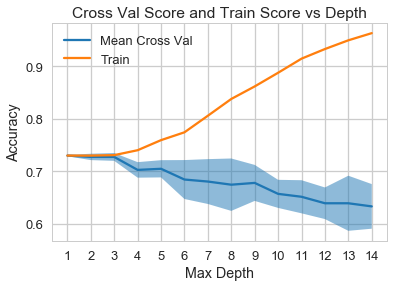

In [25]:
#create plot
plt.plot(depths, cvmeans, label="Mean Cross Val")
plt.fill_between(depths, cvmeans - 2*cvstds, cvmeans + 2*cvstds, alpha=0.5)
ylim = plt.ylim()
plt.plot(depths, train_scores, '-+', label="Train")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.xticks(depths)
plt.title("Cross Val Score and Train Score vs Depth");

In [26]:
# tree model for 2007 data
tree07 = DecisionTreeClassifier(max_depth = 4).fit(df_07_X_train, df_07_y_train.values)

tree07_train_score = tree07.score(df_07_X_train, df_07_y_train.values)
tree07_test_score = tree07.score(df_07_X_test, df_07_y_test.values)

print("The accuracy of Tree Model on 2007 Training Set is ", tree07_train_score)
print("The accuracy of Tree Model on 2007 Testing Set is ", tree07_test_score)

The accuracy of Tree Model on 2007 Training Set is  0.7399658411614005
The accuracy of Tree Model on 2007 Testing Set is  0.7320819112627986


In [27]:
# tree model for 2016 data
tree16 = DecisionTreeClassifier(max_depth = 4).fit(df_16_X_train, df_16_y_train.values)

tree16_train_score = tree16.score(df_16_X_train, df_16_y_train.values)
tree16_test_score = tree16.score(df_16_X_test, df_16_y_test.values)

print("The accuracy of Tree Model on 2016 Training Set is ", tree16_train_score)
print("The accuracy of Tree Model on 2016 Testing Set is ", tree16_test_score)

The accuracy of Tree Model on 2016 Training Set is  0.7504867731972606
The accuracy of Tree Model on 2016 Testing Set is  0.750128684287089


*** Random Forest Model ***

Next we wanted to create an ensemble model, building off our decision tree model. We stuck with our best max depth of 6, and chose to use 45 trees because it provided solid accuracy, without being too computationally expensive. Our model, again, yielded comparable results ot that of Lending Club.

In [28]:
randy07 = RandomForestClassifier(n_estimators = 45, max_depth = 6).fit(df_07_X_train, df_07_y_train.values)
randy07_train_score = randy07.score(df_07_X_train, df_07_y_train.values)
randy07_test_score = randy07.score(df_07_X_test, df_07_y_test.values)
print("The accuracy of Random Forest Model on 2007 Training Set is ", randy07_train_score)
print("The accuracy of Random Forest Model on 2007 Testing Set is ", randy07_test_score)

The accuracy of Random Forest Model on 2007 Training Set is  0.7344150298889838
The accuracy of Random Forest Model on 2007 Testing Set is  0.7389078498293515


In [29]:
randy16 = RandomForestClassifier(n_estimators = 45, max_depth = 6).fit(df_16_X_train, df_16_y_train.values)
randy16_train_score = randy16.score(df_16_X_train, df_16_y_train.values)
randy16_test_score = randy16.score(df_16_X_test, df_16_y_test.values)
print("The accuracy of Random Forest Model on 2016 Training Set is ", randy16_train_score)
print("The accuracy of Random Forest Model on 2016 Testing Set is ", randy16_test_score)

The accuracy of Random Forest Model on 2016 Training Set is  0.7504867731972606
The accuracy of Random Forest Model on 2016 Testing Set is  0.750128684287089


*** AdaBoost Model ***

Finally we used an AdaBoost model. This meta estimator fits a decision tree classifier on our training set, then fits additional copies of the model on the same training set, but adjusts weights such that subsequent classifiers focus on challenging cases. For the 2016 dataset, we had to reduce the max depth and estimators to limit the computational time of the model. Both models delivered comparable accuracies to that of Lending Club's model.

In [30]:
ada07 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6), n_estimators=800, learning_rate=0.05).fit(df_07_X_train, df_07_y_train.values)
ada07_train_score = ada07.score(df_07_X_train, df_07_y_train.values)
ada07_test_score = ada07.score(df_07_X_test, df_07_y_test.values)
print("The accuracy of Ada Boost Model on 2007 Training Set is ", ada07_train_score)
print("The accuracy of Ada Boost Model on 2007 Testing Set is ", ada07_test_score)

The accuracy of Ada Boost Model on 2007 Training Set is  1.0
The accuracy of Ada Boost Model on 2007 Testing Set is  0.7474402730375427


In [31]:
# Takes a while to run
ada16 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=80, learning_rate=0.05).fit(df_16_X_train, df_16_y_train.values)
ada16_train_score = ada16.score(df_16_X_train, df_16_y_train.values)
ada16_test_score = ada16.score(df_16_X_test, df_16_y_test.values)
print("The accuracy of Ada Boost Model on 2016 Training Set is ", ada16_train_score)
print("The accuracy of Ada Boost Model on 2016 Testing Set is ", ada16_test_score)

The accuracy of Ada Boost Model on 2016 Training Set is  0.7506881965892306
The accuracy of Ada Boost Model on 2016 Testing Set is  0.7503972427992749


*** LDA Model ***

Finally, we chose to use linear discriminant analysis. Unsurprisingly, our LDA models performed similarly to the trivial models.

In [32]:
#Build an LDA Model and report train and test accuracy
lda07 = LinearDiscriminantAnalysis().fit(df_07_X_train, df_07_y_train.values)
lda07_train_score = lda07.score(df_07_X_train, df_07_y_train.values)
lda07_test_score = lda07.score(df_07_X_test, df_07_y_test.values)
print("The accuracy of LDA Model on 2007 Training Set is ", lda07_train_score)
print("The accuracy of LDA Model on 2007 Testing Set is ", lda07_test_score)

The accuracy of LDA Model on 2007 Training Set is  0.7361229718189581
The accuracy of LDA Model on 2007 Testing Set is  0.7235494880546075


In [33]:
#Build an LDA Model and report train and test accuracy
lda16 = LinearDiscriminantAnalysis().fit(df_16_X_train, df_16_y_train.values)
lda16_train_score = lda16.score(df_16_X_train, df_16_y_train.values)
lda16_test_score = lda16.score(df_16_X_test, df_16_y_test.values)
print("The accuracy of LDA Model on 2016 Training Set is ", lda16_train_score)
print("The accuracy of LDA Model on 2016 Testing Set is ", lda16_test_score)

The accuracy of LDA Model on 2016 Training Set is  0.751605792041538
The accuracy of LDA Model on 2016 Testing Set is  0.7517624152362196
